In [1]:
import os
os.environ['THEANO_FLAGS']='device=gpu'

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_keras_cv_predict,plot_roc,my_keras_fit_predict

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
Using gpu device 0: GeForce GTX 670 (CNMeM is disabled, CuDNN 4007)
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


### Load data

In [3]:
X_train,y_train,X_test,y_test=load_data(hla_representation='one-hot',
                                        species_representation='one-hot',
                                        seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 7.9647321701 s


### CV

In [5]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

#create model creator
def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#train
y_train_pred=my_keras_cv_predict(get_model,X_train,y_train,n_folds=5,patience=3,verbose=2)

Train on 99110 samples, validate on 11013 samples
Epoch 1/100
2s - loss: 0.4839 - val_loss: 0.4355
Epoch 00000: val_loss improved from inf to 0.43546, saving model to best_model
Epoch 2/100
2s - loss: 0.3762 - val_loss: 0.3556
Epoch 00001: val_loss improved from 0.43546 to 0.35558, saving model to best_model
Epoch 3/100
2s - loss: 0.3136 - val_loss: 0.3327
Epoch 00002: val_loss improved from 0.35558 to 0.33265, saving model to best_model
Epoch 4/100
2s - loss: 0.2800 - val_loss: 0.3160
Epoch 00003: val_loss improved from 0.33265 to 0.31597, saving model to best_model
Epoch 5/100
1s - loss: 0.2543 - val_loss: 0.3120
Epoch 00004: val_loss improved from 0.31597 to 0.31199, saving model to best_model
Epoch 6/100
2s - loss: 0.2330 - val_loss: 0.3239
Epoch 00005: val_loss did not improve
Epoch 7/100
1s - loss: 0.2157 - val_loss: 0.3098
Epoch 00006: val_loss improved from 0.31199 to 0.30982, saving model to best_model
Epoch 8/100
1s - loss: 0.1986 - val_loss: 0.3119
Epoch 00007: val_loss did 

AUC: 0.925905175227


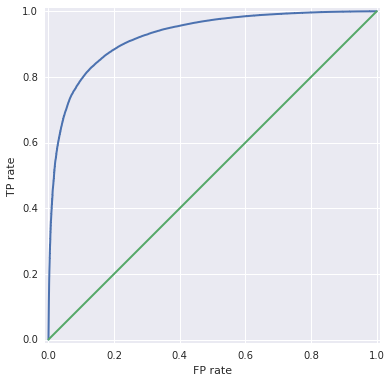

In [7]:
plot_roc(y_train,y_train_pred)

---

### Predict on blind data

In [10]:
y_test_pred=my_keras_fit_predict(get_model,X_train,y_train,X_test,
                      validation_split=0.1,patience=3,nb_epoch=100)

Train on 123888 samples, validate on 13766 samples
Epoch 1/100
123888/123888 [==============================] - 4s - loss: 0.4679 - val_loss: 0.3992
Epoch 00000: val_loss improved from inf to 0.39922, saving model to best_model
Epoch 2/100
123888/123888 [==============================] - 2s - loss: 0.3493 - val_loss: 0.3365
Epoch 00001: val_loss improved from 0.39922 to 0.33653, saving model to best_model
Epoch 3/100
123888/123888 [==============================] - 2s - loss: 0.2979 - val_loss: 0.3150
Epoch 00002: val_loss improved from 0.33653 to 0.31495, saving model to best_model
Epoch 4/100
123888/123888 [==============================] - 2s - loss: 0.2694 - val_loss: 0.3213
Epoch 00003: val_loss did not improve
Epoch 5/100
123888/123888 [==============================] - 2s - loss: 0.2472 - val_loss: 0.3083
Epoch 00004: val_loss improved from 0.31495 to 0.30826, saving model to best_model
Epoch 6/100
123888/123888 [==============================] - 2s - loss: 0.2280 - val_loss: 0.

AUC: 0.904934962475


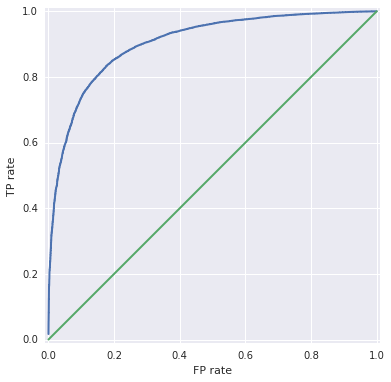

In [11]:
plot_roc(y_test,y_test_pred)

---

### Conclusion: passed 'state of the art'

Method | CV | Blind test
--- | --- | ---
SMMPMBEC | 0.8989 | 0.8474
NetMHC | 0.8930 | 0.8833
NetMHCpan |0.9176 | 0.8830
2layer net | **0.9259** | **0.9049**


---

